## Importing modules and adding project directory

In [1]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#importing modules
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize']=(10,7)
plt.rc('legend',**{'fontsize':16})
from CoolProp.HumidAirProp import HAPropsSI

#modules for data reading and parsing dates
from dataprocess import dataprocessor as dp
from dataprocess import results_process as rp

In [3]:
def approximate_match(col_name):
    for name in rp.addl['names_abreviation'].keys():
        if col_name in name:
            return rp.addl['names_abreviation'][name]
    return col_name

## Getting the results of the Chilled Water Energy Learning

### load and merge the dataframes; inverse scale the data

In [8]:
# load data path
cwedata = dp.readfolder('../models/adaptive/Trial_7/cwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
cwe = cwedata.return_df(processmethods=processmethods)
cwe.index = pd.to_datetime(cwe.index)

# inverse scale normalized values
cwe = rp.inverse_scale_cwe(cwe, 'Actual cwe', 'Predicted cwe')
# process names for better understanding
cwe.columns = [approximate_match(i) for i in cwe.columns]

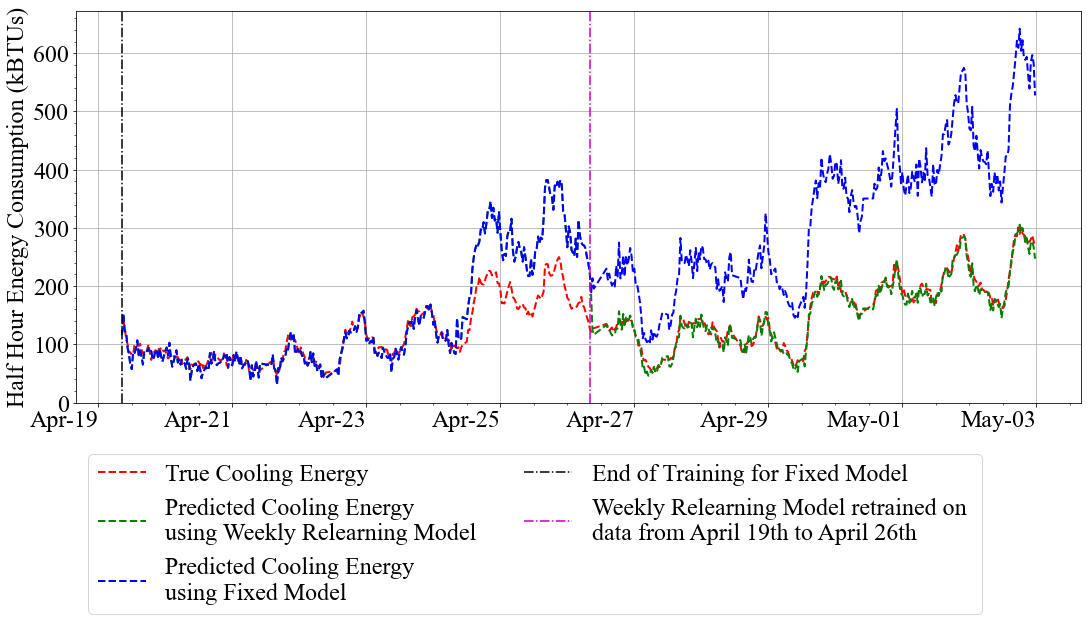

In [5]:
plt.rcParams['figure.figsize'] = (18, 8)
font = {
    'size': 24, 'family': "Times New Roman"
}
plt.rc('font', **font)

ax = cwe.loc['2019-04-19 00:00:00':'2019-05-02 23:59:59', :].plot(
    y=cwe.columns[-3:], linewidth=2.0, style=['r--', 'g--', 'b--'], rot=0)

ax.set_ylabel('Half Hour Energy Consumption (kBTUs)')
ax.grid(True)
ax.minorticks_on()

ax.axvline(cwe.index[0] + pd.Timedelta('5 minutes'), c = 'k',ls='dashdot')
ax.axvline(cwe.index[0] + +pd.Timedelta('7 days') - pd.Timedelta('30 minutes'), c='m', ls='dashdot')

ax.legend([
    "True Cooling Energy",
    "Predicted Cooling Energy\nusing Weekly Relearning Model",
    "Predicted Cooling Energy \nusing Fixed Model",
    "End of Training for Fixed Model",
    "Weekly Relearning Model retrained on \ndata from April 19th to April 26th"
],
          loc='upper left',
          fontsize=24,
          ncol=2,
          bbox_to_anchor=(0.0, -0.1))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/cwe/cweplot.pdf',
            bbox_inches='tight',
            dpi=300)

This figure demonstrates the necessity of relearning at regular intervals. Starting from 25th April, both fixed and relearning model for Cooling Energy  predictions start degrading as it starts following the increasing trend which is expected for non-staionary data. But the relearning Cooling Energy model is retrained using the data from April 19th to April 26th at the end of the week corresponding to 26th April. Thus its predictions tend to be better than a fixed model whose predictions degrade as time progresses.

### Plot the weekly relearn error

Name of the file:  ../models/adaptive/Trial_7/cwe/30min Results_File.txt


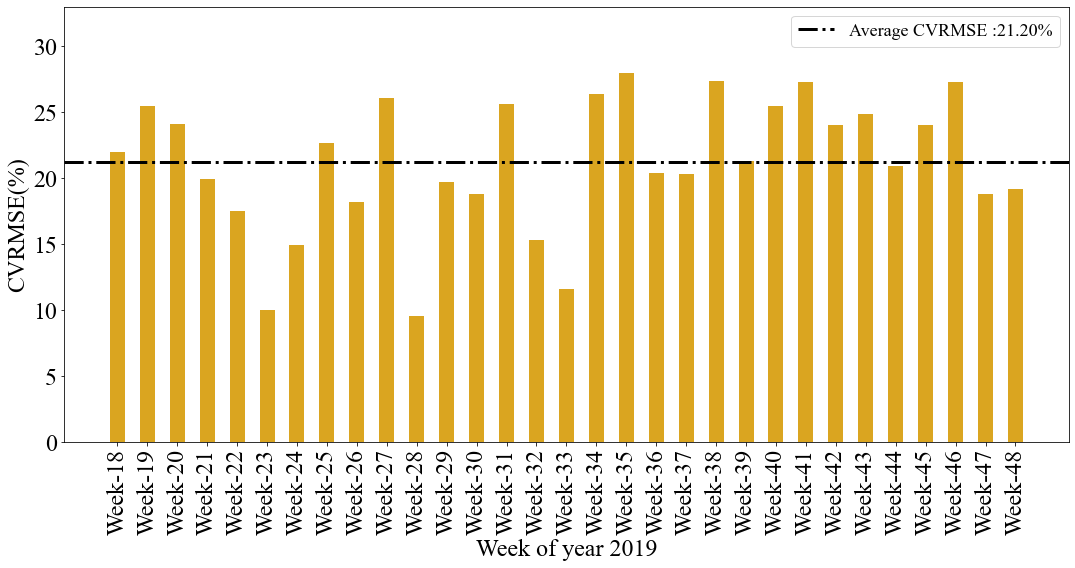

In [9]:
rp.barchart_regression_cwe(path='../models/adaptive/Trial_7/cwe/',
                           period=6,
                           savepath='../models/adaptive/Trial_7/cwe/')
#plt.text(x=11,y=44,s='Fully Dense Model used for Energy Prediction',fontsize=16)

##  Getting the results of the Hot Water Energy Learning

In [4]:
# load data path
hwedata = dp.readfolder('../models/adaptive/Trial_7/hwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
hwe = hwedata.return_df(processmethods=processmethods)
hwe.index = pd.to_datetime(hwe.index)

# inverse scale normalized values
hwe = rp.inverse_scale_hwe(hwe, 'Actual hwe', 'Predicted hwe')
# process names for better understanding
hwe.columns = [approximate_match(i) for i in hwe.columns]

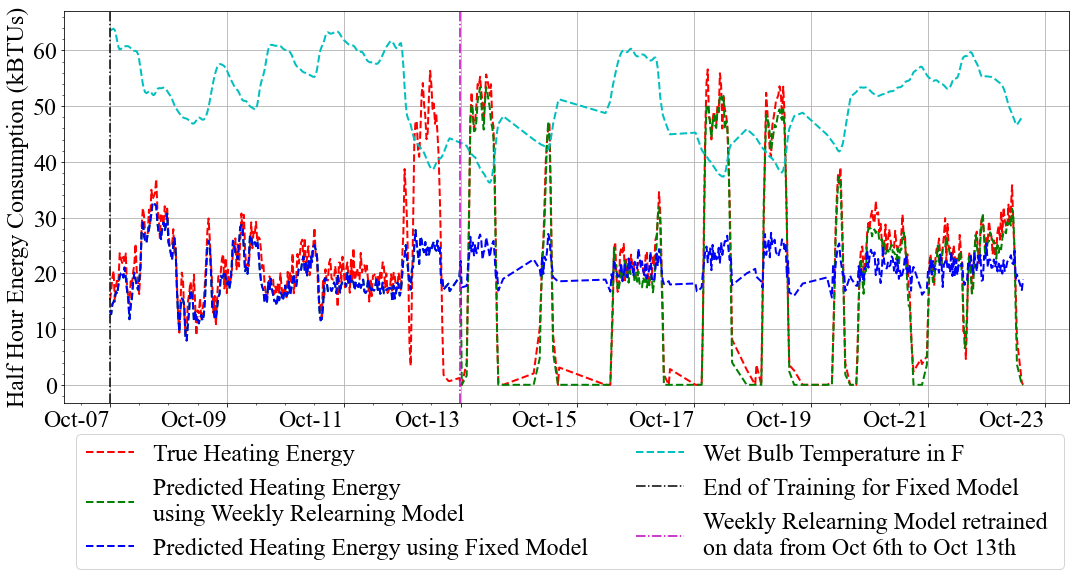

In [5]:
plt.rcParams['figure.figsize'] = (18, 8)
font = {
    'size': 24, 'family': "Times New Roman"
}
plt.rc('font', **font)

hwe = hwe.loc['2019-10-07 00:00:00':'2019-10-22 23:59:59', :]

ax = hwe.plot(
    y=hwe.columns[[-3,-2,-1,2]], linewidth=2.0, style=['r--', 'g--', 'b--','c--'], rot=0)

ax.set_ylabel('Half Hour Energy Consumption (kBTUs)')
ax.grid(True)
ax.minorticks_on()

ax.axvline(hwe.index[0] + pd.Timedelta('5 minutes'), c = 'k',ls='dashdot')
ax.axvline(hwe.index[0] + +pd.Timedelta('6 days') - pd.Timedelta('5 minutes'), c='m', ls='dashdot')

ax.legend([
    "True Heating Energy",
    "Predicted Heating Energy \nusing Weekly Relearning Model",
    "Predicted Heating Energy using Fixed Model",
    "Wet Bulb Temperature in F",
    "End of Training for Fixed Model",
    "Weekly Relearning Model retrained \non data from Oct 6th to Oct 13th",
],
          fontsize=24,
          loc='upper left',
            ncol=2,
          bbox_to_anchor=(0.0, -0.05))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/hwe/hweplot.pdf',
            bbox_inches='tight',
            dpi=300)

As observed over here, as the wet bulb temperature drops, the system switches to a preheat mode but the Energy model which is not retrained fails to capture this behavior while the Relearning model is able to learn this behavior on a small section of the data and predict better.

### Plot the weekly relearn error

Name of the file:  ../models/adaptive/Trial_7/hwe/30min Results_File.txt


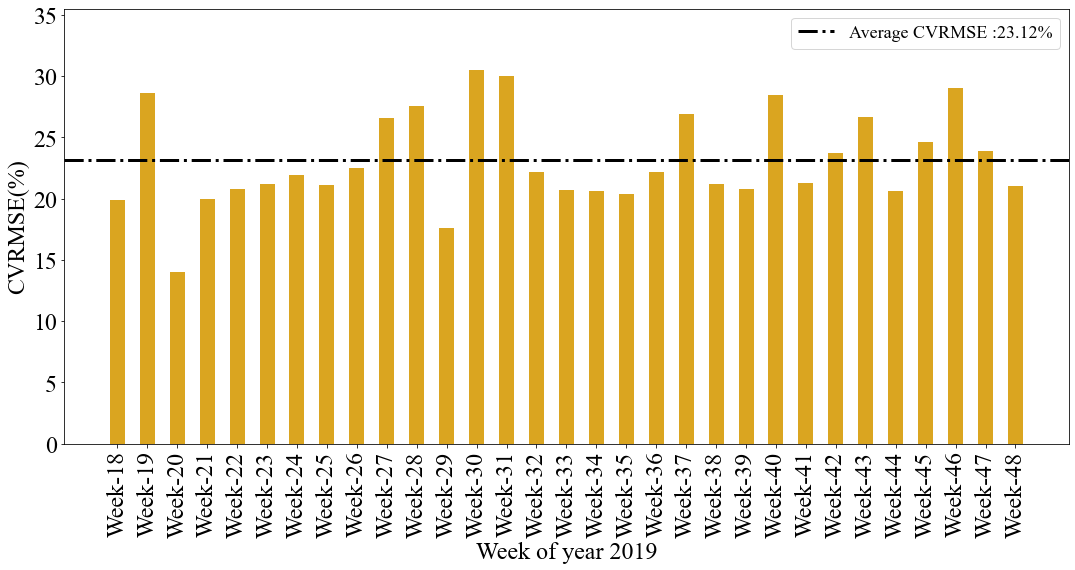

In [5]:
rp.barchart_regression_hwe(path='../models/adaptive/Trial_7/hwe/',
                           period=6,
                           savepath='../models/adaptive/Trial_7/hwe/')

## Getting the results of the Hot Water Energy Valve state

In [6]:
# load data path
vlvdata = dp.readfolder('../models/adaptive/Trial_7/vlv/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
vlv = vlvdata.return_df(processmethods=processmethods)
vlv.index = pd.to_datetime(vlv.index)

# convert probabilities to classes
vlv = rp.process_plots_softmax(vlv, 'Actual valve_state', 'Predicted valve_state')
# scale for better visualization
#vlv['Actual valve_state'] = vlv['Actual valve_state']*100
#vlv['Predicted valve_state'] = vlv['Predicted valve_state']*100


# process names for better understanding
vlv.columns = [approximate_match(i) for i in vlv.columns]

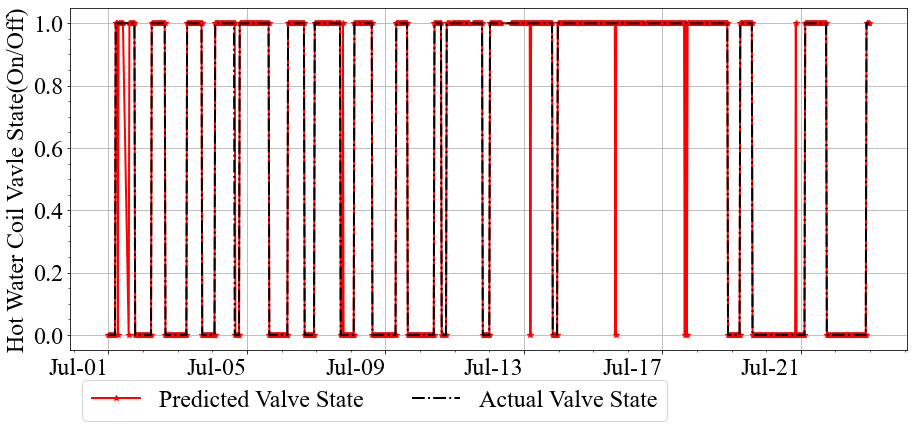

In [5]:
plt.rcParams['figure.figsize'] = (15, 7)
font = {'size': 24, 'family': "Times New Roman"}
plt.rc('font', **font)

vlv = vlv.loc['2019-07-01 00:00:00':'2019-07-22 23:59:59', :]

ax = vlv.plot(y=vlv.columns[[-1, -2]],
              linewidth=2.0,
              style=['r*-', 'k-.'],
              rot=0)

ax.set_ylabel('Hot Water Coil Vavle State(On/Off)')
ax.grid(True)
ax.minorticks_on()

ax.legend(["Predicted Valve State", "Actual Valve State"],
          fontsize=24,
          loc='upper left',
          ncol=2,
          bbox_to_anchor=(0.0, -0.05))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/vlv/vlvplot.pdf',
            bbox_inches='tight',
            dpi=300)

### Plot the tested metrics

Name of the file:  ../models/adaptive/Trial_7/vlv/30min Results_File.txt


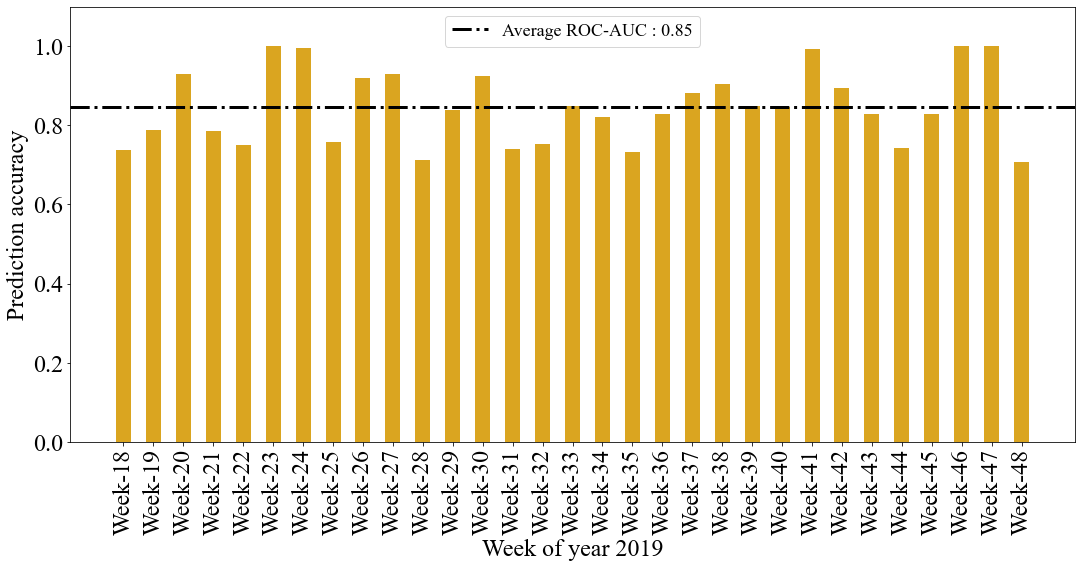

In [7]:
rp.barchart_classifier(path='../models/adaptive/Trial_7/vlv/', period=6,
                    savepath='../models/adaptive/Trial_7/vlv/', metricname='accuracy')

Name of the file:  ../models/adaptive/Trial_7/vlv/30min Results_File.txt


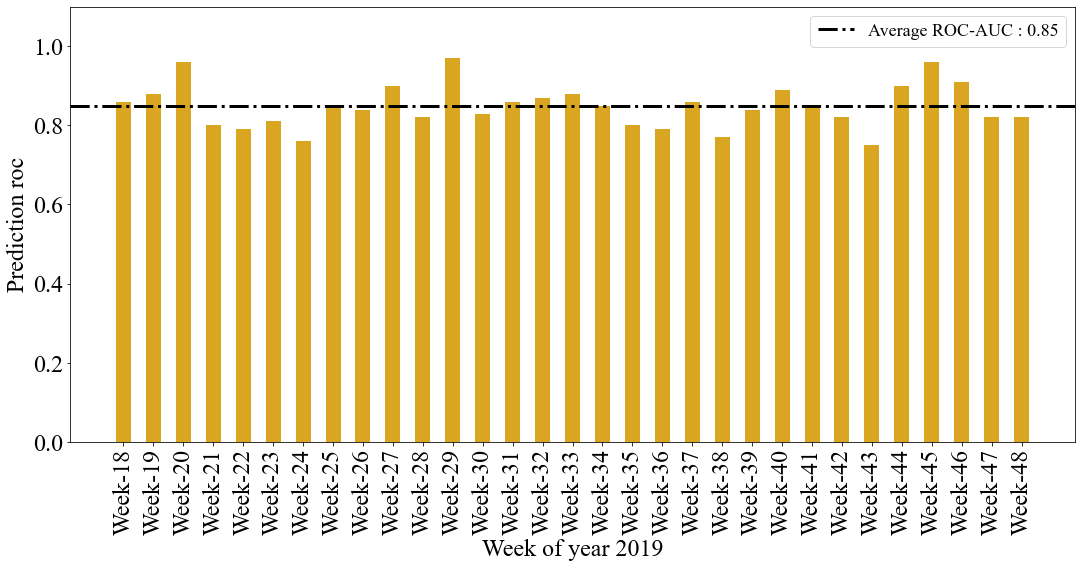

In [10]:
rp.barchart_classifier(path='../models/adaptive/Trial_7/vlv/', period=6,
                    savepath='../models/adaptive/Trial_7/vlv/', metricname='roc')

Name of the file:  ../models/adaptive/Trial_7/vlv/30min Results_File.txt


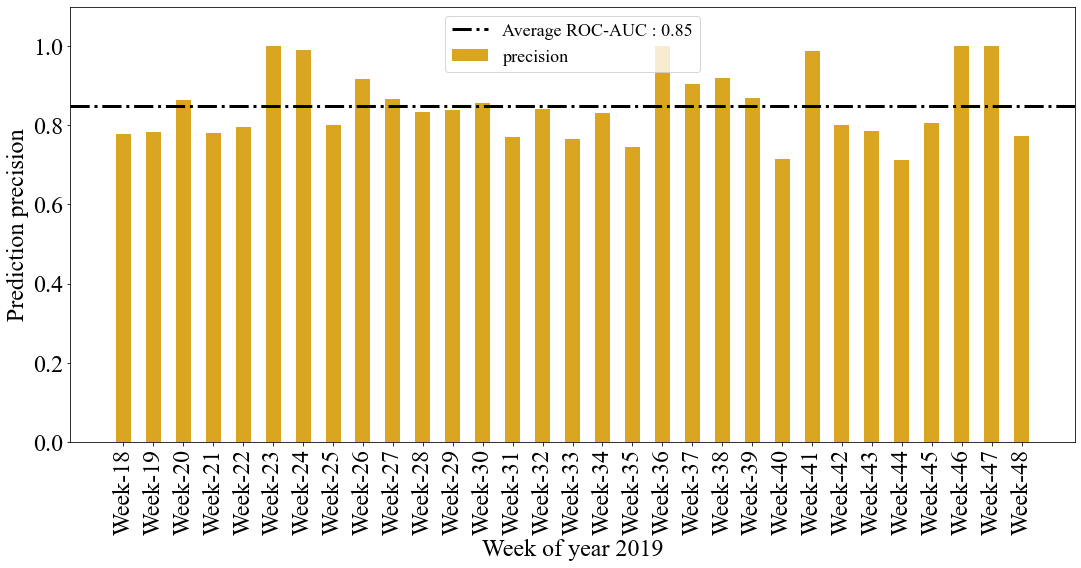

In [7]:
rp.barchart_classifier(path='../models/adaptive/Trial_7/vlv/', period=6,
                    savepath='../models/adaptive/Trial_7/vlv/', metricname='precision')

## Results on Reinforcement Learning

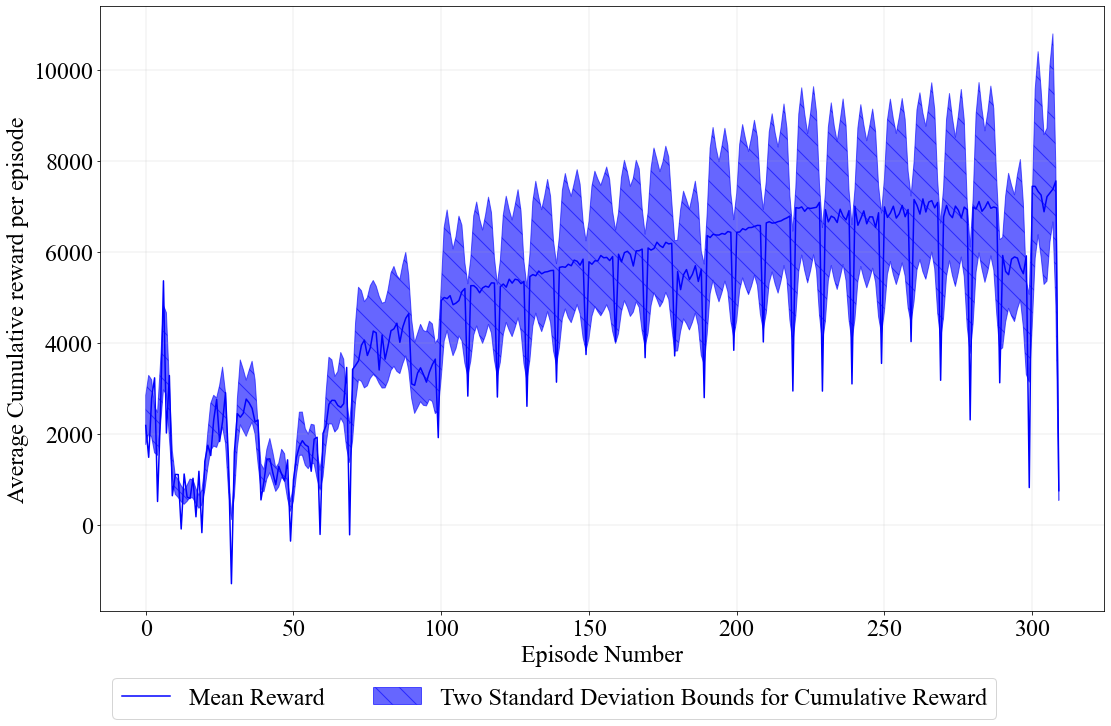

In [4]:
rp.reward_agg_plot(trial_list = [7], 
                interval_start = 0, 
                interval_end = 30,
                readfrom = '../log/'+'adaptive'+'/',
                saveto = '../models/'+'adaptive'+'/Trial_7/', 
                envid =  0)

In [4]:
rldata = pd.read_csv('../models/adaptive/Trial_7/rl/performance/EnvId0-results.csv')
rl_scaled = dp.datetime_parse(rldata, '%Y-%m-%d %H:%M:%S', 'datetime')

In [5]:
# load the scaler for scaling and inverse scaling the dataframe
scaler = dp.dataframescaler('../models/adaptive/Trial_0/datastats.pkl')
scaler.stats.loc['max','sat'] = scaler.stats.loc['max','sat_stpt']
scaler.stats.loc['min','sat'] = scaler.stats.loc['min','sat_stpt']

input_columns = ['cwe','hwe','cwe','hwe','oat',  'orh', 'sat', 'avg_stpt']
df_2scale_columns = ['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe', 'oat', 'orh', 'T_rl_disch', 'avg_stpt']

# scale the dataframe relevant coumns
rl = rp.inverse_scale_results(rl_scaled, input_columns, df_2scale_columns, scaler)

#### Cooling Energy Savings

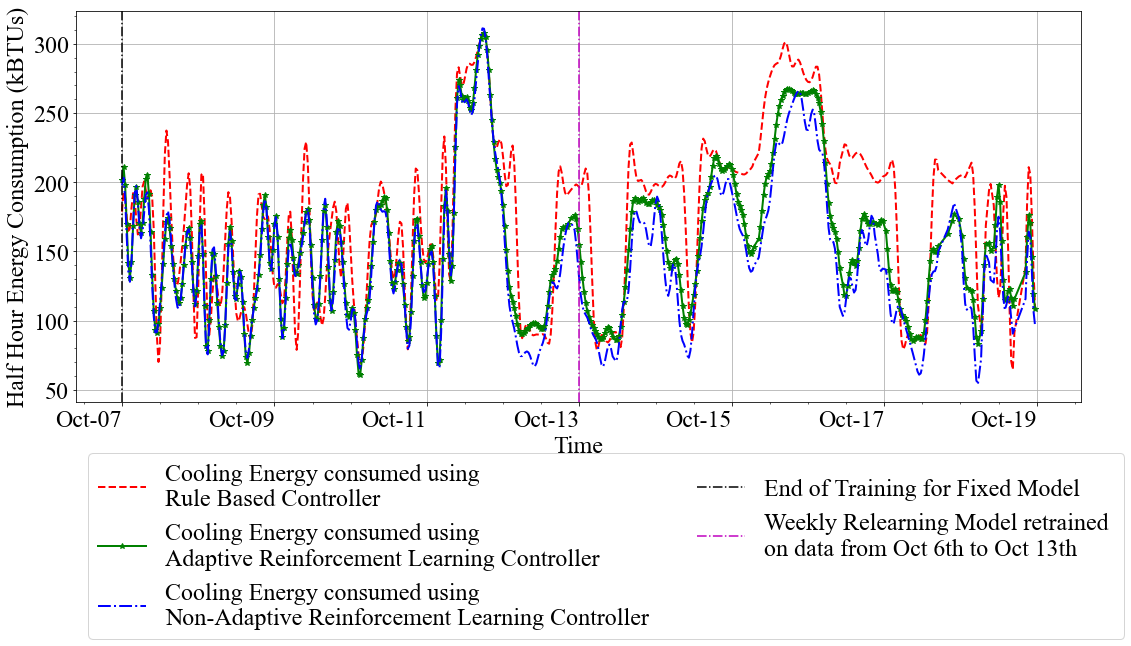

In [25]:
plt.rcParams['figure.figsize'] = (18, 8)
font = {'size': 24, 'family': "Times New Roman"}
plt.rc('font', **font)

rl = rl.loc['2019-10-07 00:00:00':'2019-10-18 23:59:59', :]

ax = rl.plot(y=['hist_cwe', 'rl_cwe', 'rl_fixed_cwe'],
             linewidth=2.0,
             style=['r--', 'g*-', 'b-.'],
             rot=0)

ax.set_ylabel('Half Hour Energy Consumption (kBTUs)')
ax.grid(True)
ax.minorticks_on()

ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + pd.Timedelta('5 minutes'),
           c='k',
           ls='dashdot')
ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + +pd.Timedelta('6 days') -
           pd.Timedelta('5 minutes'),
           c='m',
           ls='dashdot')

ax.legend([
    'Cooling Energy consumed using \nRule Based Controller',
    'Cooling Energy consumed using \nAdaptive Reinforcement Learning Controller',
    'Cooling Energy consumed using \nNon-Adaptive Reinforcement Learning Controller',
    "End of Training for Fixed Model",
    "Weekly Relearning Model retrained \non data from Oct 6th to Oct 13th",
],
          fontsize=24,
          loc='upper left',
          ncol=2,
          bbox_to_anchor=(0.0, -0.1))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/rl/cwe_rl_plot.pdf',
            bbox_inches='tight',
            dpi=300)

Cooling Energy Savings: 9.3%

#### Heating Energy Comparison

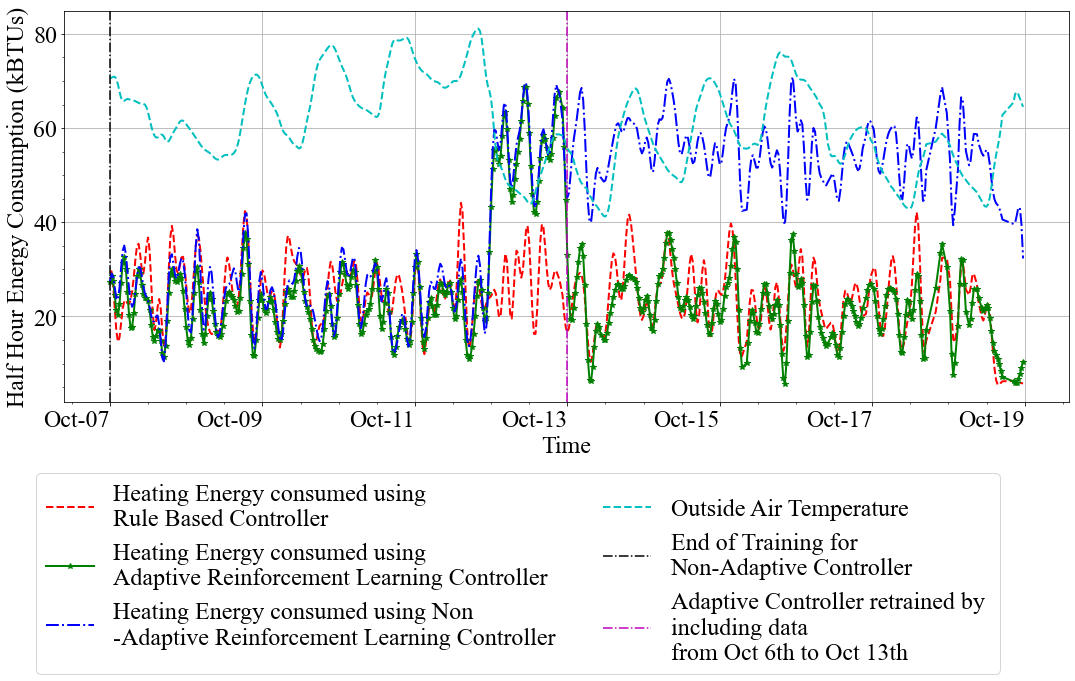

In [19]:
plt.rcParams['figure.figsize'] = (18, 8)
font = {'size': 24, 'family': "Times New Roman"}
plt.rc('font', **font)

rl = rl.loc['2019-10-07 00:00:00':'2019-10-18 23:59:59', :]

ax = rl.plot(y=['hist_hwe', 'rl_hwe', 'rl_fixed_hwe', 'oat'],
             linewidth=2.0,
             style=['r--', 'g*-', 'b-.','c--'],
             rot=0)

ax.set_ylabel('Half Hour Energy Consumption (kBTUs)')
ax.grid(True)
ax.minorticks_on()

ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + pd.Timedelta('5 minutes'),
           c='k',
           ls='dashdot')
ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + +pd.Timedelta('6 days') -
           pd.Timedelta('5 minutes'),
           c='m',
           ls='dashdot')

ax.legend([
    'Heating Energy consumed using \nRule Based Controller',
    'Heating Energy consumed using \nAdaptive Reinforcement Learning Controller',
    'Heating Energy consumed using Non\n-Adaptive Reinforcement Learning Controller',
    "Outside Air Temperature",
    "End of Training for \nNon-Adaptive Controller",
    "Adaptive Controller retrained by \nincluding data \nfrom Oct 6th to Oct 13th",
],
          fontsize=24,
          loc='upper left',
          ncol=2,
          bbox_to_anchor=(-0.04, -0.15))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/rl/hwe_rl_plot.pdf',
            bbox_inches='tight',
            dpi=300)

Heating Energy Savings: 6.4%

#### Total Energy Behavior

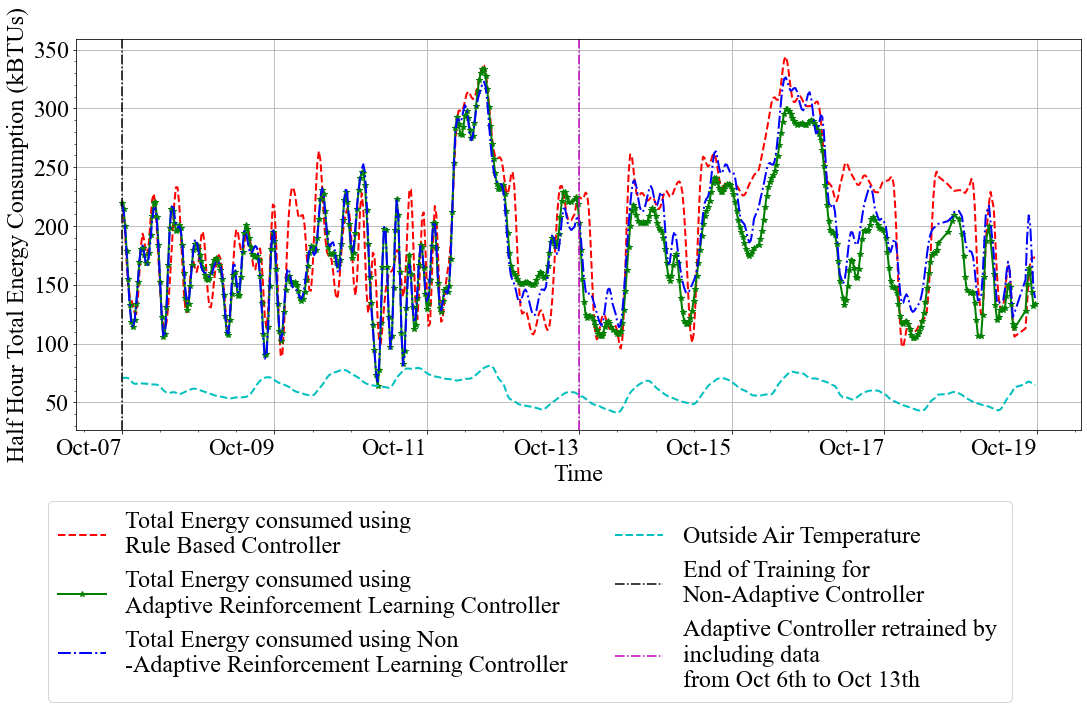

In [6]:
plt.rcParams['figure.figsize'] = (18, 8)
font = {'size': 24, 'family': "Times New Roman"}
plt.rc('font', **font)

rl = rl.loc['2019-10-07 00:00:00':'2019-10-18 23:59:59', :]

rl['total_energy_rl_adapt'] = rl['rl_hwe']+rl['rl_cwe']  # 'hist_cwe', 'rl_cwe', 'rl_fixed_cwe'
rl['total_energy_rl_fixed'] = rl['rl_fixed_cwe']+rl['rl_fixed_hwe']
rl['total_energy_hist'] = rl['hist_hwe']+rl['hist_cwe']

ax = rl.plot(y=['total_energy_hist', 'total_energy_rl_adapt', 'total_energy_rl_fixed', 'oat'],
             linewidth=2.0,
             style=['r--', 'g*-', 'b-.','c--'],
             rot=0)

ax.set_ylabel('Half Hour Total Energy Consumption (kBTUs)')
ax.grid(True)
ax.minorticks_on()

ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + pd.Timedelta('5 minutes'),
           c='k',
           ls='dashdot')
ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + +pd.Timedelta('6 days') -
           pd.Timedelta('5 minutes'),
           c='m',
           ls='dashdot')

ax.legend([
    'Total Energy consumed using \nRule Based Controller',
    'Total Energy consumed using \nAdaptive Reinforcement Learning Controller',
    'Total Energy consumed using Non\n-Adaptive Reinforcement Learning Controller',
    "Outside Air Temperature",
    "End of Training for \nNon-Adaptive Controller",
    "Adaptive Controller retrained by \nincluding data \nfrom Oct 6th to Oct 13th",
],
          fontsize=24,
          loc='upper left',
          ncol=2,
          bbox_to_anchor=(-0.04, -0.15))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/rl/total_rl_plot.pdf',
            bbox_inches='tight',
            dpi=300)

#### Action behavior

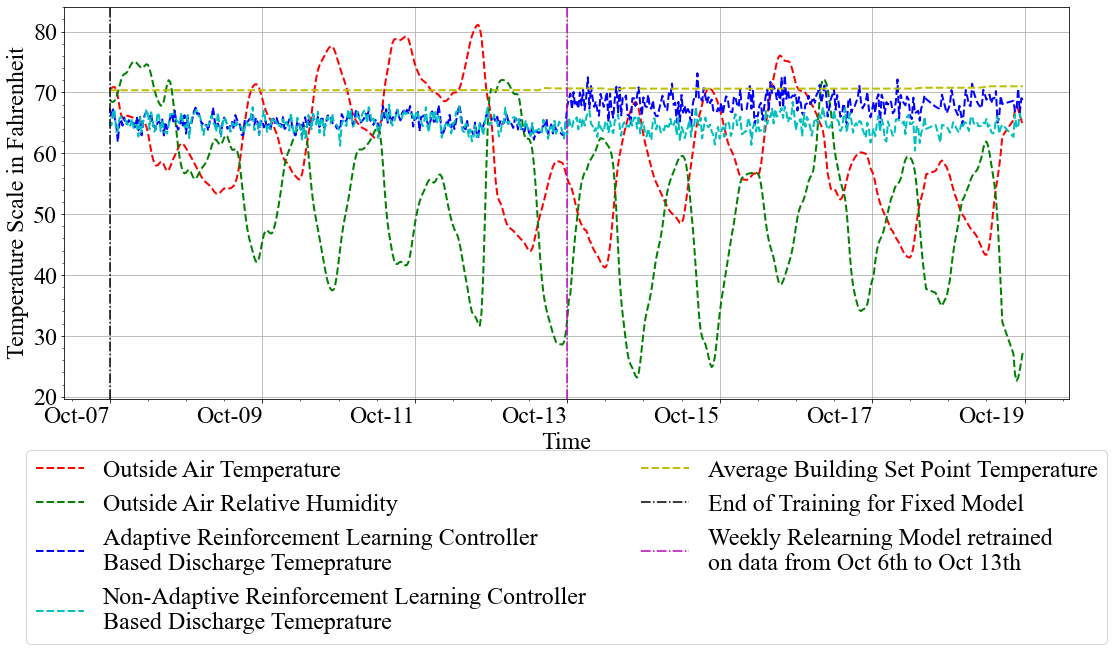

In [24]:
# plt.rcParams['figure.figsize'] = (20, 7)
# masking = (rl.index >= '2019-01-01 00:00:00') & (rl.index <= '2019-08-28 23:59:59')
# rl.plot(y=['oat', 'orh', 'T_rl_disch', 'avg_stpt', ],
#                                       linewidth=3.0,
#                                       style=['r*-', 'g-', 'b-', 'c-'], rot=45)

plt.rcParams['figure.figsize'] = (18, 8)
font = {'size': 24, 'family': "Times New Roman"}
plt.rc('font', **font)

rl = rl.loc['2019-10-07 00:00:00':'2019-10-18 23:59:59', :]

ax = rl.plot(y=['oat', 'orh', 'T_rl_disch', 'fixed_axn', 'avg_stpt'],
             linewidth=2.0,
             style=['r--', 'g--', 'b--', 'c--','y--'],
             rot=0)

ax.set_ylabel('Temperature Scale in Fahrenheit')
ax.grid(True)
ax.minorticks_on()

ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + pd.Timedelta('5 minutes'),
           c='k',
           ls='dashdot')
ax.axvline(pd.to_datetime('2019-10-07 00:00:00') + +pd.Timedelta('6 days') -
           pd.Timedelta('5 minutes'),
           c='m',
           ls='dashdot')

ax.legend([
    'Outside Air Temperature',
    'Outside Air Relative Humidity',
    'Adaptive Reinforcement Learning Controller \nBased Discharge Temeprature',
    'Non-Adaptive Reinforcement Learning Controller \nBased Discharge Temeprature',
    "Average Building Set Point Temperature",
    "End of Training for Fixed Model",
    "Weekly Relearning Model retrained \non data from Oct 6th to Oct 13th",
],
          fontsize=24,
          loc='upper left',
          ncol=2,
          bbox_to_anchor=(-0.05, -0.1))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('../models/adaptive/Trial_7/rl/var_rl_plot.pdf',
            bbox_inches='tight',
            dpi=300)

![image](Picture2.png)